In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.cm as cm
## Helper functions ##
def moving_average(x,w):
    w_min=1#int(np.floor(w/2))
    nan_loc=np.argwhere(np.isnan(x))
    mov_temp=pd.Series(x).rolling(w, min_periods=w_min).mean()
    mov_temp=np.asarray(mov_temp)
    mov_temp[nan_loc]=np.nan
    return mov_temp
av_window=10

In [2]:
save_dir = '/nese/mit/group/evlab/projects/Greta_Eghbal_manifolds/extracted/'
model_identifier= 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed_data_figure_5_KNN.pkl'
d_fig_5=pickle.load(open(os.path.join(save_dir,model_identifier),'rb'))
x_bar=d_fig_5['x_bar']
data=d_fig_5['data']
accuracies=d_fig_5['accuracies']
epoch_bar=d_fig_5['epoch_bar']
epoch_batch=d_fig_5['epoch_batch']


___________ Layer: layer_1_Linear____________
Hierarchy 0: Fixed point collapsed: 319 | Fixed point: 31721


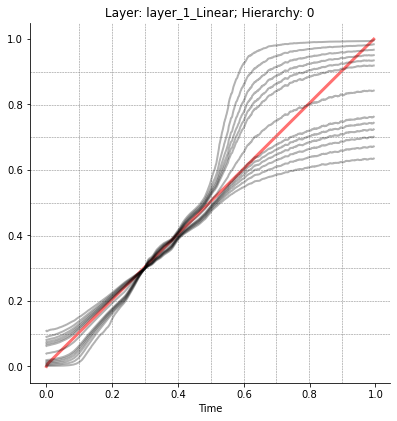

In [3]:
## INCLUDE PLOTS IN THE LOOP ##
## SPECS ALL ##
layers = ['layer_1_Linear']
hier_idxs = np.arange(6)
hier_idxs = [0]
num_colors=len(layers)+1
h0=cm.get_cmap('inferno_r',num_colors)
layer_cols=np.flipud(h0(np.arange(num_colors)/num_colors))
num_colors=accuracies.shape[1]+1
color_fact=num_colors+2
h0=cm.get_cmap('inferno',color_fact)
line_cols=np.flipud(h0(np.arange(color_fact)/color_fact))
line_cols=line_cols[1:,:]
v='v3'
xtick=np.arange(0,12,2)/10
num_colors=len(hier_idxs)+1
h0=cm.get_cmap('viridis_r',num_colors)
hier_cols=np.flipud(h0(np.arange(num_colors)/num_colors))

for row, layer in enumerate(layers):
    print(f'\n___________ Layer: {layer}____________')
    for hier_idx in hier_idxs:
        num_subsamples = 100
        k = 100
        # hier_idx = 5
        # layer = layers[0]
        mov_avg = 10 
        save_fig = True
        collapse_subsamples = True # whether to average across num_subsamples! currently both computed
        p_array = [1, 5, 10, 15, 20, 25, 50, 75, 80, 85, 90, 95, 99]
        D = data['D']
        I = data['I']
        I_stand = I/np.max(I)
        epochs = data['epochs']  
        D_k_mean = np.mean(D,axis=1)
        D_k_mean_collapsed = np.mean(D_k_mean.reshape(-1, num_subsamples),axis=1)
        # analyses of fixed points and percentiles
        # compute percentiles
        p = np.percentile(I_stand, p_array, axis=1)
        p_collapse = [np.mean(x.reshape(-1, num_subsamples),axis=1) for x in p]
        time_diag = np.arange(len(D_k_mean))
        time_diag_collapsed = np.arange(len(D_k_mean_collapsed))/1060#*100
        norms = np.zeros((k-1, I.shape[0]))
        for i in range(1, k):
            norms[i-1, :] = I[:, 0] - I[:, i] 
        mean_norms = np.mean(norms,axis=0)
        mean_k_norms = np.mean(norms,axis=1)
        # norms_mov_avg = (moving_average(abs(mean_norms), mov_avg))
        norms_collapsed = np.mean(mean_norms.reshape(-1, num_subsamples),axis=1)
        # norms_mov_avg = moving_average(abs(mean_norms), mov_avg)
        norms_mov_avg = moving_average(abs(mean_norms), mov_avg)
        norms_mov_avg_collapsed = moving_average(abs(norms_collapsed), mov_avg)
        fixed_point = np.argmin((norms_mov_avg))
        fixed_point_collapsed = np.argmin((norms_mov_avg_collapsed))
        print(f'Hierarchy {hier_idx}: Fixed point collapsed: {fixed_point_collapsed} | Fixed point: {fixed_point}')
        ## PLOTS ##
        alpha=0.3
        plt.figure(figsize=(15,10))
        ax=plt.subplot(position=(.1,.1,.5*10/15,.5))
        for i in range(len(p_array)):
            plt.plot(moving_average(x_bar,av_window),moving_average(p_collapse[i], av_window), label=f'Percentile {p_array[i]}', alpha=alpha, color='k',linewidth=2,zorder=5)
        plt.xlabel('Time')
        plt.title(f'Layer: {layer}; Hierarchy: {hier_idx}')
        ax.plot(moving_average(x_bar,av_window), time_diag_collapsed,color=(1,.3,.3), label='Current pseudotime',linewidth=3,zorder=0,alpha=.8)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
        ax.hlines(epoch_bar,ax.get_xlim()[0],ax.get_xlim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
        ax.autoscale(enable=True, axis='x', tight=True)
        ax.autoscale(enable=True, axis='y', tight=True)
        # 


        
        